# install tensorflow

In [ ]:
!pip install tensorflow

# Importing  Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading data -> Breast Cancer Dataset

In [ ]:
cancer = datasets.load_breast_cancer()

In [ ]:
X = pd.DataFrame(data = cancer.data, columns=cancer.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**data info**

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)


b) texture (standard deviation of gray-scale values)



c) perimeter


d) area


e) smoothness (local variation in radius lengths)


f) compactness (perimeter^2 / area - 1.0)


g) concavity (severity of concave portions of the contour)


h) concave points (number of concave portions of the contour)


i) symmetry


j) fractal dimension ("coastline approximation" - 1)


The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image.


resulting in 30 features



In [ ]:
cols=X.columns
cols

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [ ]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


**We have to scale cause the values are very far apart**


**max (mean area = 2501 ) & max (mean smoothness = 0.163400	)**

In [ ]:
y = pd.DataFrame(cancer.target)   #define data frame couse use value_count
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [ ]:
y.value_counts()

1    357
0    212
dtype: int64

**Class distribution :- 357 benign , 212 malignant**

In [ ]:
y = cancer.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
X.shape

(569, 30)

In [ ]:
y.shape

(569,)

# Split data into Train and Test datasets

In [ ]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,random_state=42,stratify=y)

print(f'The shape of X train is {X_train.shape}')
print(f'The shape of X test is {X_test.shape}')
print(f'The shape of y train is {y_train.shape}')
print(f'The shape of y test is {y_test.shape}')

The shape of X train is (512, 30)
The shape of X test is (57, 30)
The shape of y train is (512,)
The shape of y test is (57,)


In [ ]:
# X_train.shape

(512, 30)

In [ ]:
# y_test.shape

(57,)

# Applying StandardScaler()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [ ]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

# Preparing the Model

In [ ]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(32,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 29, 16)            48        
                                                                 
 batch_normalization (Batch  (None, 29, 16)            64        
 Normalization)                                                  
                                                                 
 conv1d_1 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 32)            128       
 chNormalization)                                                
                                                                 
 flatten (Flatten)           (None, 896)               0         
                                                                 
 dense (Dense)               (None, 32)                2

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=20,verbose=1,validation_data=(X_test,y_test))

# Verbose=0 (silent)
# Verbose=1 (progress bar)
# Verbose=2 (one line per epoch)

Epoch 1/20
16/16 [==============================] - 2s 24ms/step - loss: 0.6619 - accuracy: 0.7305 - val_loss: 0.6499 - val_accuracy: 0.8772
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.2989 - accuracy: 0.9121 - val_loss: 0.6282 - val_accuracy: 0.7193
Epoch 3/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1963 - accuracy: 0.9434 - val_loss: 0.6126 - val_accuracy: 0.6316
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1598 - accuracy: 0.9590 - val_loss: 0.5964 - val_accuracy: 0.6491
Epoch 5/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1227 - accuracy: 0.9688 - val_loss: 0.5804 - val_accuracy: 0.6491
Epoch 6/20
16/16 [==============================] - 0s 6ms/step - loss: 0.1159 - accuracy: 0.9648 - val_loss: 0.5658 - val_accuracy: 0.6667
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0991 - accuracy: 0.9805 - val_loss: 0.5485 - val_accuracy: 0.7018
Epoch 8/20
16/16 [=

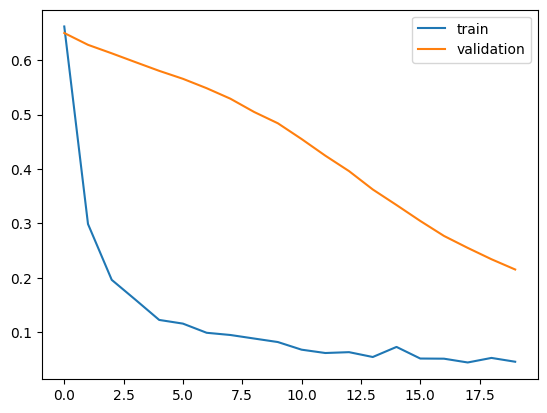

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

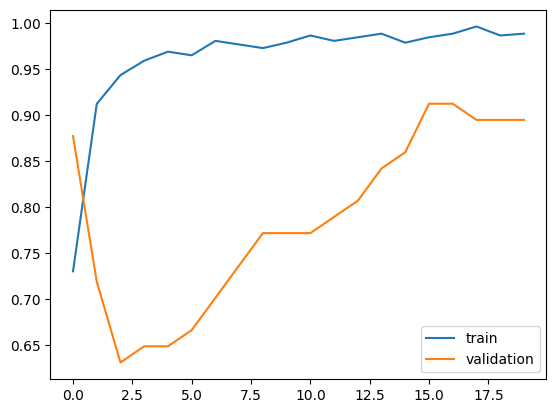

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

**--------------------------------------------------------------------------------------------------------------------------------------------------------**

# Preparing the New Model After Update value

In [ ]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 29, 16)            48        
                                                                 
 batch_normalization_2 (Bat  (None, 29, 16)            64        
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 29, 16)            0         
                                                                 
 conv1d_3 (Conv1D)           (None, 28, 32)            1056      
                                                                 
 batch_normalization_3 (Bat  (None, 28, 32)            128       
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 28, 32)           

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

# Verbose=0 (silent)
# Verbose=1 (progress bar)
# Verbose=2 (one line per epoch)

Epoch 1/35
16/16 [==============================] - 2s 21ms/step - loss: 0.6589 - accuracy: 0.6289 - val_loss: 0.6450 - val_accuracy: 0.7368
Epoch 2/35
16/16 [==============================] - 0s 7ms/step - loss: 0.4022 - accuracy: 0.8242 - val_loss: 0.5996 - val_accuracy: 0.8772
Epoch 3/35
16/16 [==============================] - 0s 7ms/step - loss: 0.3287 - accuracy: 0.8535 - val_loss: 0.5577 - val_accuracy: 0.8947
Epoch 4/35
16/16 [==============================] - 0s 7ms/step - loss: 0.2744 - accuracy: 0.8945 - val_loss: 0.5173 - val_accuracy: 0.9298
Epoch 5/35
16/16 [==============================] - 0s 7ms/step - loss: 0.2420 - accuracy: 0.9121 - val_loss: 0.4767 - val_accuracy: 0.9649
Epoch 6/35
16/16 [==============================] - 0s 7ms/step - loss: 0.2229 - accuracy: 0.9180 - val_loss: 0.4388 - val_accuracy: 0.9649
Epoch 7/35
16/16 [==============================] - 0s 7ms/step - loss: 0.1802 - accuracy: 0.9219 - val_loss: 0.4032 - val_accuracy: 0.9649
Epoch 8/35
16/16 [=

# visualization
**Plots of Loss and Accuracy**

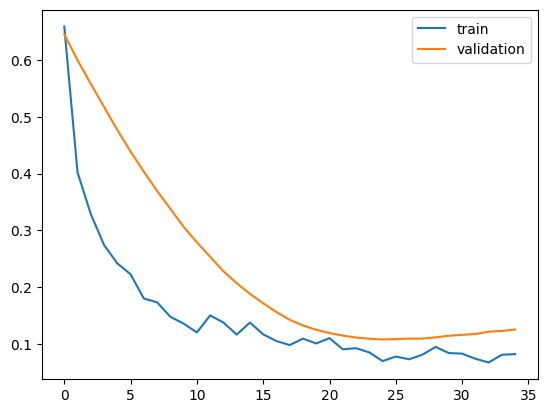

In [ ]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

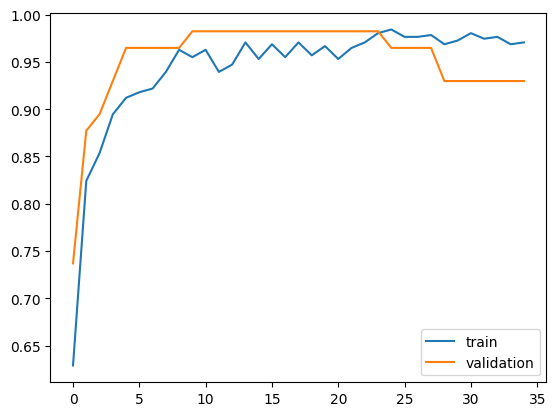

In [ ]:
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

# Another Way to Visualization

In [ ]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'])
  plt.show()

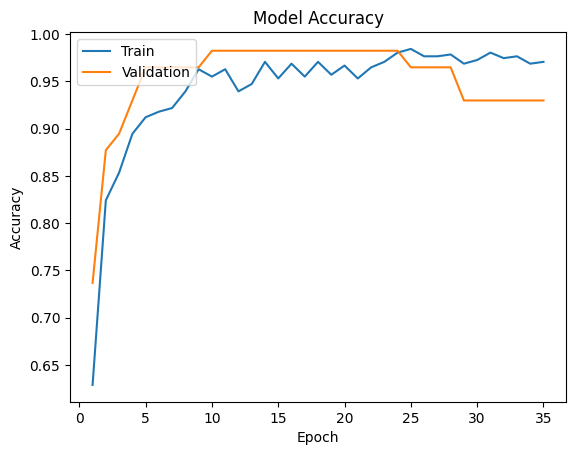

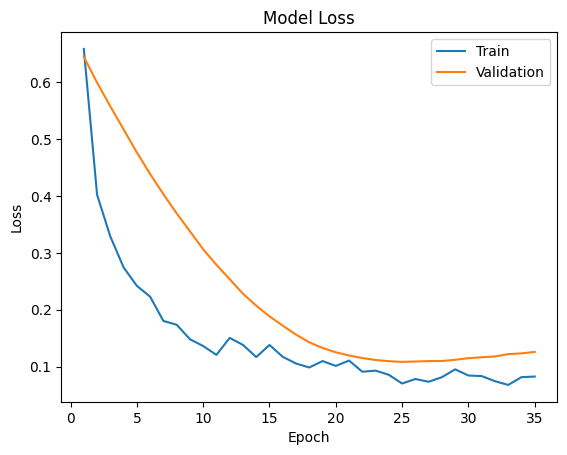

In [ ]:
plotLearningCurve(history,35)

In [ ]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

2/2 [==============================] - 0s 6ms/step


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


<Axes: >

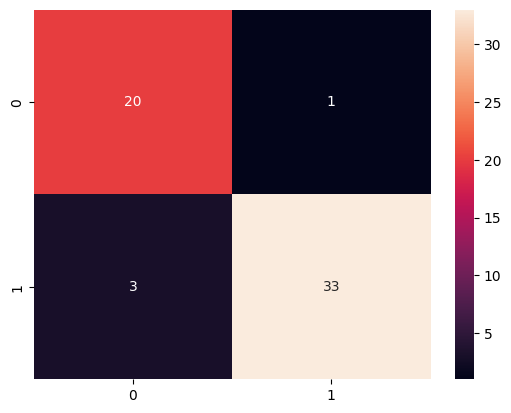

In [ ]:
sns.heatmap(cm, annot=True)

# Another Way to Visualization 2

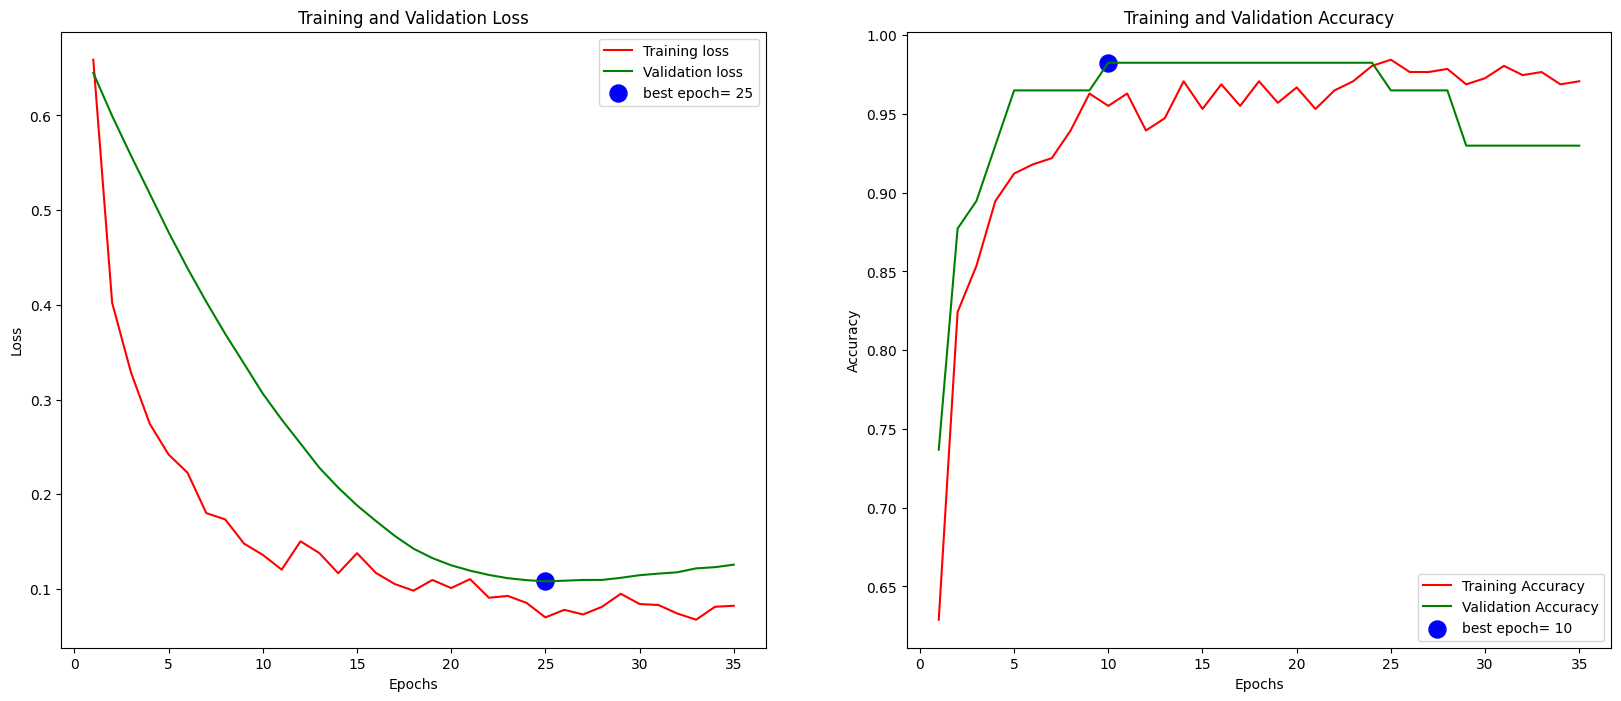

In [ ]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
highest_acc = val_acc[index_acc]
Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
# plt.style.use('fivethirtyeight')

plt.subplot(121)
plt.plot(Epochs, train_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(Epochs, train_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , highest_acc,s=150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()